In [24]:
# read/plot GPS baseline change
%matplotlib inline

import os
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
from mintpy.utils import ptime
from mintpy.simulation.plot import *

work_dir = os.path.expanduser('~/development/python/2019_Kirishima/Shinmoedake_TS')

gps_dir = os.path.expanduser('~/insarlab/Kirishima/GPS/Elodie')
site1, site2 = 960714, 950486

files1 = [os.path.join(gps_dir, '{}_GSI_{}.txt'.format(site1, i)) for i in ['east', 'north', 'vertical']]
files2 = [os.path.join(gps_dir, '{}_GSI_{}.txt'.format(site2, i)) for i in ['east', 'north', 'vertical']]

In [11]:
def read_gps_displacement(files):
    # open files
    fc1 = np.loadtxt(files[0], dtype=bytes).astype(np.float64)
    fc2 = np.loadtxt(files[1], dtype=bytes).astype(np.float64)
    fc3 = np.loadtxt(files[2], dtype=bytes).astype(np.float64)

    # read dates
    dt1 = np.array(ptime.decimal_year2datetime(list(fc1[:,0])))
    dt2 = np.array(ptime.decimal_year2datetime(list(fc2[:,0])))
    dt3 = np.array(ptime.decimal_year2datetime(list(fc3[:,0])))
    dts = np.array(sorted(list(set(dt1) & set(dt2) & set(dt3))))

    # get displacement on common dates
    dis_e = np.zeros(dts.shape, np.float64)
    dis_n = np.zeros(dts.shape, np.float64)
    dis_u = np.zeros(dts.shape, np.float64)
    for i in range(len(dts)):
        idx1 = np.where(dt1 == dts[i])[0][0]
        idx2 = np.where(dt2 == dts[i])[0][0]
        idx3 = np.where(dt3 == dts[i])[0][0]
        dis_e[i] = fc1[:,1][idx1]
        dis_n[i] = fc2[:,1][idx2]
        dis_u[i] = fc3[:,1][idx3]
    return dts, dis_e, dis_n, dis_u

dates1, dis_e1, dis_n1, dis_u1 = read_gps_displacement(files1)
dates2, dis_e2, dis_n2, dis_u2 = read_gps_displacement(files2)

In [13]:
pos_e1 = dis_e1 + -3.5406731072E+06
pos_n1 = dis_n1 + 4.0924225108E+06
pos_u1 = dis_u1 + 3.3650701285E+06

pos_e2 = dis_e2 + -3.5404441380E+06
pos_n2 = dis_n2 + 4.1074852547E+06
pos_u2 = dis_u2 + 3.3469695626E+06

In [18]:
## pos --> baseline change
dates = np.array(sorted(list(set(dates1) & set(dates2))))
gps_dis = np.zeros(dates.shape, np.float64)
for i in range(len(dates)):
    idx1 = np.where(dates1 == dates[i])[0][0]
    idx2 = np.where(dates2 == dates[i])[0][0]
    dis = ((pos_e1[idx1] - pos_e2[idx2]) ** 2 
         + (pos_n1[idx1] - pos_n2[idx2]) ** 2
         + (pos_u1[idx1] - pos_u2[idx2]) ** 2) ** 0.5
    gps_dis[i] = dis

gps_dis -= gps_dis[0]
gps_dis *= 100.

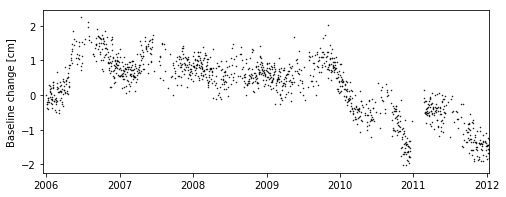

In [19]:
fig, ax = plt.subplots(figsize=[8, 3])
ax.scatter(dates, gps_dis, marker='.', color='k', s=1**2)
ax.set_xlim(dt(2005, 12, 15), dt(2012, 1, 15))
ax.set_ylabel('Baseline change [cm]')
plt.show()

save figure to file: /Users/yunjunz/development/python/2019_Kirishima/Shinmoedake_TS/gps_baseline_ts.png


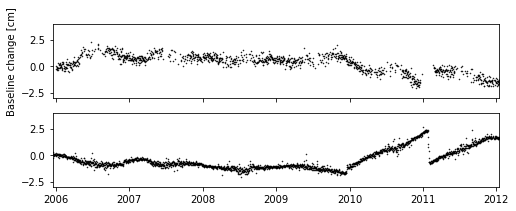

In [25]:
## Read GPS baseline change
from scipy.io import loadmat
gps_len_file = os.path.expanduser('~/insarlab/Kirishima/GPS/GSI_F3/len_960714_950486.mat')
gps_len_mat = loadmat(gps_len_file)
gps_lens = gps_len_mat['Len'].flatten() * 100.
gps_dates = [ptime.datenum2datetime(i) for i in gps_len_mat['T'].flatten()]
# start from zero
idx = gps_dates.index(dt(2005, 12, 15, 12, 0))
gps_lens -= gps_lens[idx]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[8, 3], sharex=True)
axs[0].scatter(dates, gps_dis, marker='.', color='k', s=1**2)
axs[1].scatter(gps_dates, gps_lens, marker='.', color='k', s=1**2)
for ax in axs:
    ax.set_xlim(dt(2005, 12, 15), dt(2012, 1, 15))
    ax.set_ylim(-3, 4)
axs[0].set_ylabel('Baseline change [cm]')

out_file = os.path.join(work_dir, 'gps_baseline_ts.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file: {}'.format(out_file))
plt.show()